# Twitter Data - NLP Text Pre-Processing + Exploration
* Notebook by Adam Lang
* Date: 3/18/2024
* In this notebook we will use NLP text pre-processing techniques to perform exploration of this dataset.

## Table of Contents
1. Dataset overview
2. Word Frequency Generation
3. Exploratory Data Analysis (EDA) using Word Clouds
4. Text Cleaning Techniques

### 1. Dataset overview

In [2]:
# import libraries and data
import pandas as pd
import re

# load dataset
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classical NLP/tweets.csv', encoding='ISO-8859-1')

In [3]:
# print shape of dataframe
print('Shape of data => ', df.shape)

Shape of data =>  (5157, 14)


In [4]:
# view dataframe
df.head()

,text,favorited,favoriteCount,replyToSN,created,truncated,replyToSID,id,replyToUID,statusSource,screenName,retweetCount,isRetweet,retweeted
0,RT @rssurjewala: Critical question: Was PayTM ...,False,0.0,NaN,2016-11-23 18:40:30,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",HASHTAGFARZIWAL,331.0,True,False
1,RT @Hemant_80: Did you vote on #Demonetization...,False,0.0,NaN,2016-11-23 18:40:29,False,NaN,8.014957e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",PRAMODKAUSHIK9,66.0,True,False
2,"RT @roshankar: Former FinSec, RBI Dy Governor,...",False,0.0,NaN,2016-11-23 18:40:03,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",rahulja13034944,12.0,True,False
3,RT @ANI_news: Gurugram (Haryana): Post office ...,False,0.0,NaN,2016-11-23 18:39:59,False,NaN,8.014955e+17,NaN,"<a href=""http://twitter.com/download/android"" ...",deeptiyvd,338.0,True,False
4,RT @satishacharya: Reddy Wedding! @mail_today ...,False,0.0,NaN,2016-11-23 18:39:39,False,NaN,8.014954e+17,NaN,"<a href=""http://cpimharyana.com"" rel=""nofollow...",CPIMBadli,120.0,True,False


In [11]:
# lets look at a few tweets in the text column
for i in df.text[0:10]:
  print(i)

RT @rssurjewala: Critical question: Was PayTM informed about #Demonetization edict by PM? It's clearly fishy and requires full disclosure &amp;Â
RT @Hemant_80: Did you vote on #Demonetization on Modi survey app?
RT @roshankar: Former FinSec, RBI Dy Governor, CBDT Chair + Harvard Professor lambaste #Demonetization.

If not for Aam Aadmi, listen to thÂ
RT @ANI_news: Gurugram (Haryana): Post office employees provide cash exchange to patients in hospitals #demonetization https://t.co/uGMxUP9Â
RT @satishacharya: Reddy Wedding! @mail_today cartoon #demonetization #ReddyWedding https://t.co/u7gLNrq31F
@DerekScissors1: IndiaÂs #demonetization: #Blackmoney a symptom, not the disease https://t.co/HSl6Ihj0Qe via @ambazaarmag
RT @gauravcsawant: Rs 40 lakh looted from a bank in Kishtwar in J&amp;K. Third such incident since #demonetization. That's how terrorists haveÂ
RT @Joydeep_911: Calling all Nationalists to join...
Walk for #CorruptionFreeIndia and spread the benefits of #Demonetization a

In [5]:
# look at the df info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5157 entries, 0 to 5156
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   text           5157 non-null   object 
 1   favorited      5147 non-null   object 
 2   favoriteCount  5147 non-null   float64
 3   replyToSN      1094 non-null   object 
 4   created        5147 non-null   object 
 5   truncated      5147 non-null   object 
 6   replyToSID     881 non-null    float64
 7   id             5147 non-null   float64
 8   replyToUID     1094 non-null   float64
 9   statusSource   5147 non-null   object 
 10  screenName     5147 non-null   object 
 11  retweetCount   5147 non-null   float64
 12  isRetweet      5147 non-null   object 
 13  retweeted      5147 non-null   object 
dtypes: float64(5), object(9)
memory usage: 564.2+ KB


Summary:
* We can see there are more than 5,000 tweets in the daaset and 14 columns.
* We will use the `text` column for our NLP analysis.

### 2. Word Frequency Generation

In [6]:
# import spacy
import spacy

In [7]:
# load model
nlp = spacy.load('en_core_web_sm')

In [12]:
# combine tweets
combined_tweets = ' '.join(df.text.values) # concats the tweets in text column
combined_tweets = re.sub('(\r\n|amp|<|>)+', '', combined_tweets)

In [13]:
# create spacy nlp doc object
doc = nlp(combined_tweets)

In [14]:
# create a function for generation word frequencies
def gen_freq(tokens):
  # create pandas series with freqs
  word_freq = pd.Series([token.text for token in tokens]).value_counts()

  # print frequencies
  print(word_freq[:20])

  return word_freq

In [15]:
# getting word frequency
word_freq = gen_freq(doc)

#                 5528
demonetization    2433
.                 2191
:                 2025
Demonetization    1887
,                 1730
to                1658
                 1642
the               1592
of                1584
RT                1369
in                1343
is                1085
on                 945
a                  816
and                711
India              662
's                 662
?                  654
-                  644
dtype: int64


summary:
* Above we can see the top 20 most common tokens in the tweets.

### 3. EDA using word clouds

In [16]:
# import libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [20]:
# write a function to create a wordcloud
def generate_wordcloud(data):
  # creating a wordcloud
  wc = WordCloud(width=400, height=330, max_words=200,background_color='white').generate_from_frequencies(data) #pandas series input data

  # setting fig size
  plt.figure(figsize=(14,12))

  # display wordcloud as image
  plt.imshow(wc, interpolation='bilinear')

  # removing all axes
  plt.axis('off')

  plt.show()

In [21]:
# pring unique tokens
print('No. of unique words=>', len(word_freq))

No. of unique words=> 16802


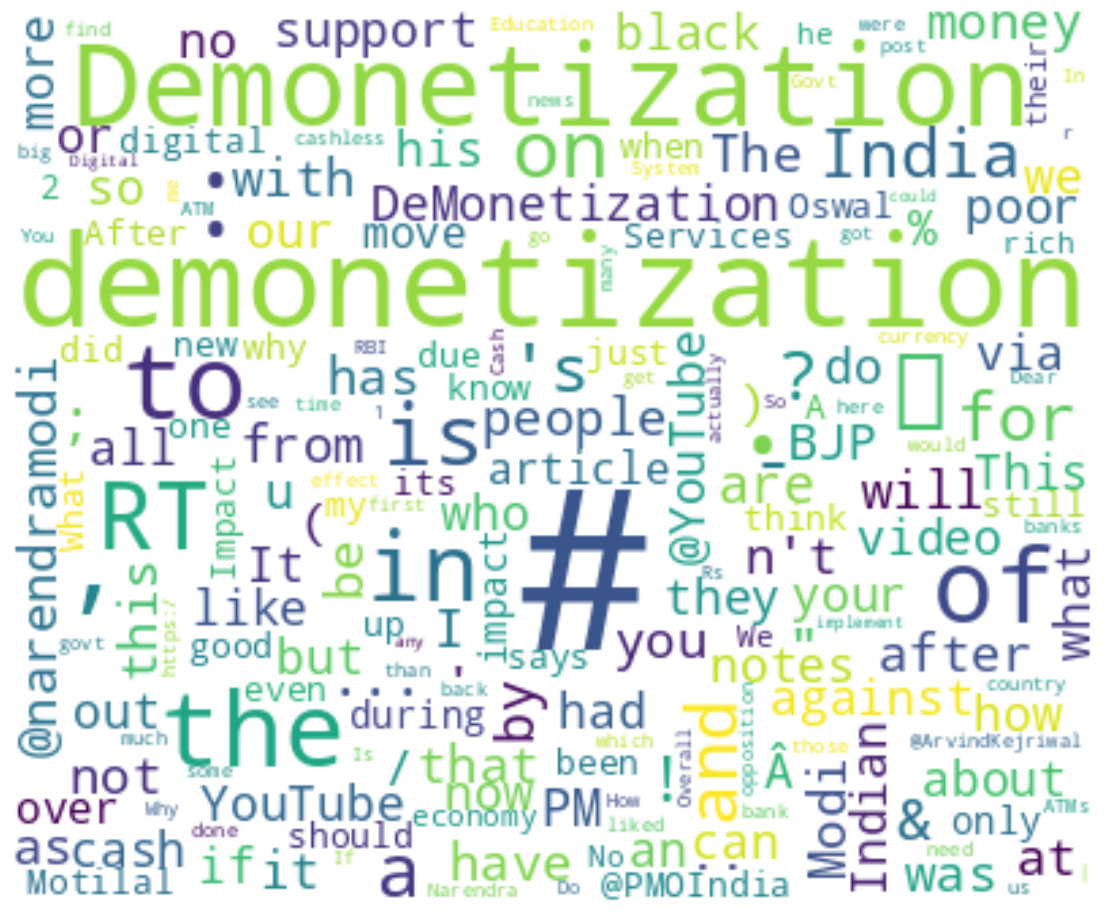

In [22]:
# generate the word cloud
generate_wordcloud(word_freq)

summary:
* The word cloud is "clouded" by stop words and characters.
* We should pre-process the text to see if we can remove some of the textual components that are less meaningful.

### 4. Text cleaning - Part 1

In [23]:
import re

In [25]:
# removing RT and # from tweets
combined_tweets = re.sub('(RT|#)','',combined_tweets)

In [26]:
# lowercasing the text
combined_tweets = combined_tweets.lower()

In [27]:
# creating doc object in spacy
doc = nlp(combined_tweets)

In [28]:
# remove stopwrds and punctuations
tokens = [token for token in doc if (token.is_stop==False|token.is_punct==False)]

In [29]:
# get word frequencies
word_freq = gen_freq(tokens)

demonetization    4525
                  1672
                 1358
india              698
modi               388
money              317
@narendramodi      314
people             308
pm                 286
                  284
cash               281
youtube            248
impact             183
like               162
black              160
digital            151
support            146
@youtube           142
govt               128
u                  127
dtype: int64


summary: we can see above there are some special characters and symbols still present in the data.

In [30]:
# print unique words
print("No. of unique words=>", len(word_freq))

No. of unique words=> 14725


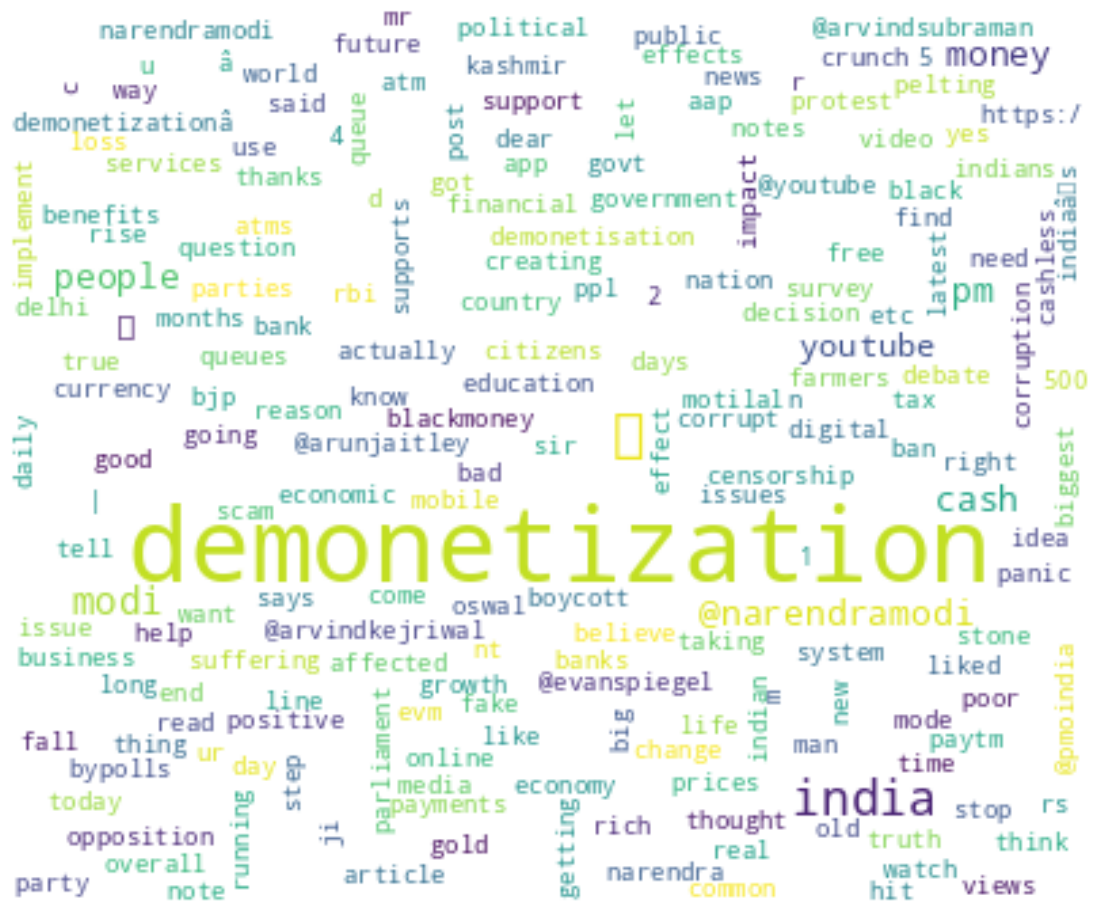

In [31]:
# generate wordcloud
generate_wordcloud(word_freq)

### Text Cleaning - Part 2
* We need to remove some of the spaces and special character/symbols.

In [32]:
# combine tokens into text
combined_tweets = ' '.join([token.text for token in tokens])

In [45]:
# remove spaces "\r\n", "amp", "<", ">", @, "https://" and digits from text
combined_tweets = re.sub('(\r\n|amp|<|>|@|"https://|[0-9])+', '', combined_tweets)

In [46]:
# create spacy doc object
doc = nlp(combined_tweets)

In [47]:
# remove whitespaces from text
tokens = [token for token in doc if (token.is_space==False)]

In [48]:
# get word frequencies
word_freq = gen_freq(tokens)

demonetization    4534
india              698
youtube            392
modi               389
narendramodi       354
money              318
people             308
pm                 291
cash               281
impact             183
like               162
black              160
digital            151
support            146
govt               128
u                  127
bjp                122
indian             120
new                119
notes              118
dtype: int64


In [49]:
print("No. of unique words=>", len(word_freq))

No. of unique words=> 14184


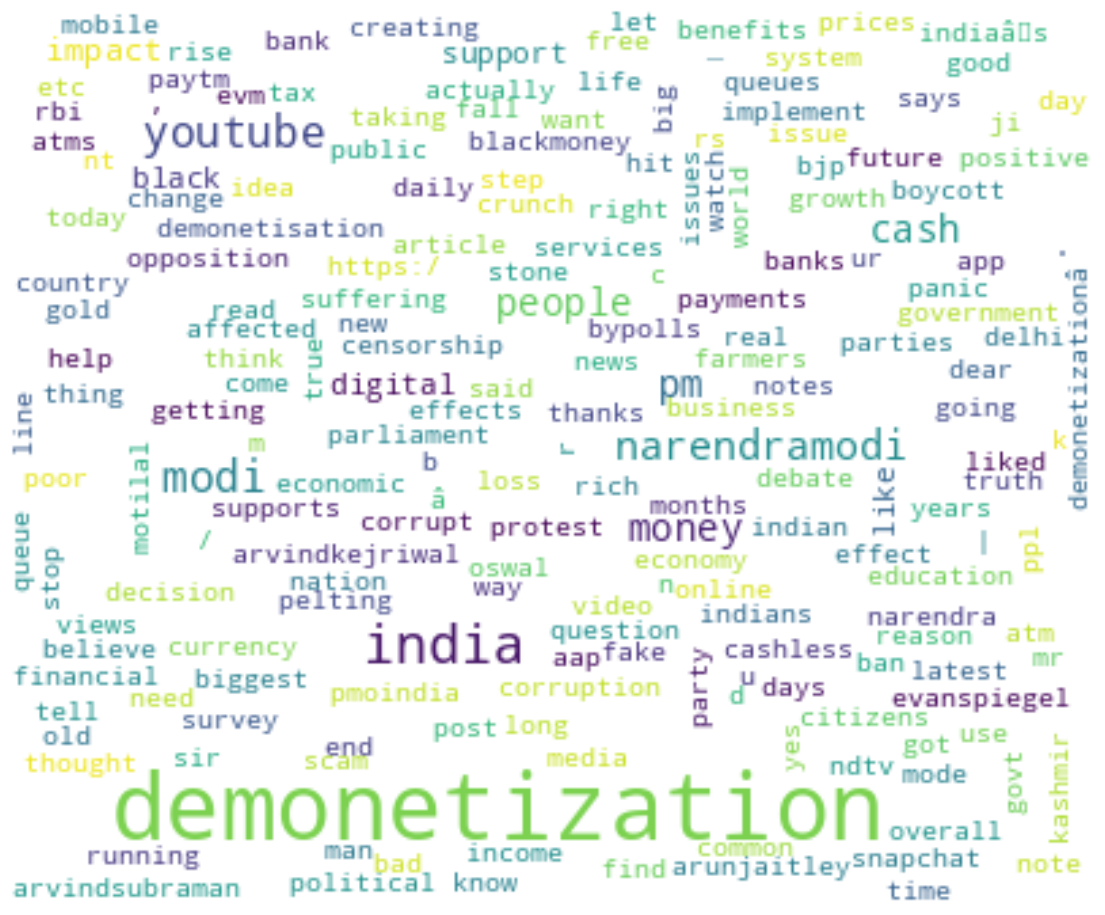

In [50]:
# generate word cloud again
generate_wordcloud(word_freq)

summary:
* We can now get a better view of the tweet semantics and most important terms.
* The purpose of this exercise was to walk through how to remove "noise" from the NLP text dataset.
* These steps may differ depending on the dataset, domain and datasource you are working with.